# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.

##### VARIABLES
<table>
  <tr>
    <th>Nombre de la columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>PassengerId</td>
    <td>Identificador del pasajero. Único por cada pasajero.</td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>Indica 1 si el pasajero sobrevivió al naufragio, 0 si no sobrevivió.</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Clase a la que pertenecía el pasajero: 1, 2 o 3.</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Nombre del pasajero.</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Sexo biológico del pasajero.</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Edad del pasajero.</td>
  </tr>
  <tr>
    <td>SibSp</td>
    <td>Número de hermanos, hermanas, hermanastros o hermanastras en el barco.</td>
  </tr>
  <tr>
    <td>Parch</td>
    <td> Número de padres e hijos en el barco. </td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>Identificador del billete.</td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>Precio pagado por el billete.</td>
  </tr>
    <tr>
    <td>Cabin</td>
    <td>Identificador del camarote asignado al pasajero.</td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>Puerto en el que embarcó el pasajero.</td>
  </tr>
</table>


In [98]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [92]:
datos = pd.read_csv(r'C:\Users\danyr\Documents\GitHub\Titanic\titanic.csv')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
# Número de valores nulos.
datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
# Porcentaje de filas con valores nulos.
filas = len(datos)
filas_null = datos.isnull().any(axis=1).sum()
filas_sin_null = filas - filas_null

porcentajes = pd.DataFrame({'Tipo': ['Filas con valores nulos', 'Filas sin valores nulos'],
                               'Cantidad': [filas_null, filas_sin_null]}) # dataframe con las cantidades de filas con nulos y sin nulos.


fig = px.pie(porcentajes, names='Tipo', values='Cantidad', title='Porcentaje de filas con al menos un valor nulo',
             width= 700,
             color_discrete_sequence=px.colors.sequential.Blues_r
             )
fig.show()



### Limpieza de datos:

In [218]:
#Creamos una copia del dataframe datos, para poder modificarlo sin afectar al original.
df = datos.copy() 

# Creación de una columna nueva para el apellido.
df['LastName'] = df['Name'].apply(lambda x : x.split(',')[0])


* Transformamos los datos de la edad en números enteros

In [219]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce').astype(int, errors = 'ignore')


#### Vamos a tratar los valores nulos en 'Age' con el método de KNN:

In [220]:
#Se estandariza la columna 'Fare' para que no tenga un impacto desproporcionado en la distancia 
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

In [221]:
columnas=['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked',"Age"] # estas son las columnas que se usarán como predictores.
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[columnas]))
df_encoded.columns = encoder.get_feature_names_out(columnas)


In [222]:
# Creamos el modelo KNN con el mejor valor de k
knn = KNeighborsClassifier(n_neighbors=3)

# Ajustamos el modelo a los datos sin valores nulos
knn.fit(X_train, y_train)

# Imputamos los valores faltantes en la columna 'Age'
imputed_ages = knn.predict(df_without_age)
df.loc[df['Age'].isna(), 'Age'] = imputed_ages

* Saber la edad mínima y máxima de las personas del barco.


In [223]:
minAge = round(df['Age'].min())
maxAge = df['Age'].max()
print(f'La edad mínima es: {minAge} \nLa edad máxima es: {maxAge}')

La edad mínima es: 0 
La edad máxima es: 80.0


* Conocer la mediana de las edades.


La mediana de la edad con los valores nulos sin corregir:  28.0
La mediana de la edad con valores nulos corregidos:  26.0


Text(0, 0.5, 'Edad')

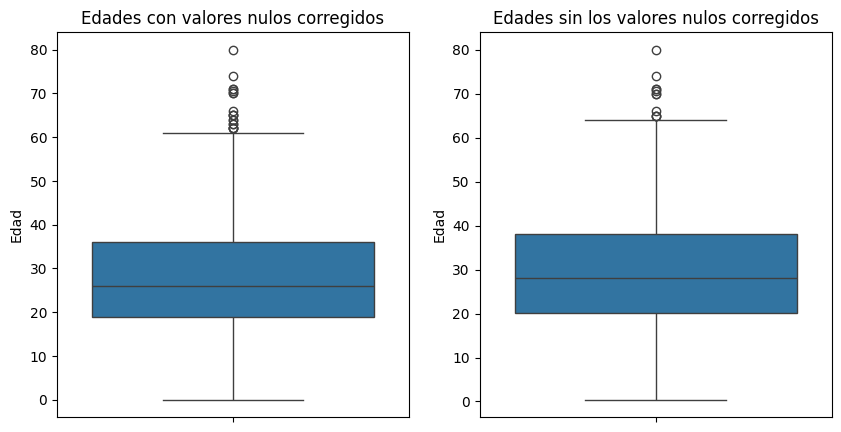

In [224]:
print('La mediana de la edad con los valores nulos sin corregir: ', datos['Age'].median())
print('La mediana de la edad con valores nulos corregidos: ',round(df['Age'].median(),2))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=df, y='Age', ax=axs[0])
sns.boxplot(data=datos['Age'], ax=axs[1])
axs[0].set_title('Edades con valores nulos corregidos')
axs[0].set_ylabel('Edad')
axs[1].set_title('Edades sin los valores nulos corregidos')
axs[1].set_ylabel('Edad')

* Porcentaje de filas con valores nulos después de corregir los NaN en 'Age'

In [225]:
# Porcentaje de filas con valores nulos.
filas = len(df)
filas_null = df.isnull().any(axis=1).sum()
filas_sin_null = filas - filas_null

porcentajes = pd.DataFrame({'Tipo': ['Filas con valores nulos', 'Filas sin valores nulos'],
                               'Cantidad': [filas_null, filas_sin_null]}) 


fig = px.pie(porcentajes, names='Tipo', values='Cantidad', title='Filas con al menos un valor nulo después de corregir "Age"',
             width= 700,
             color_discrete_sequence=px.colors.sequential.Blues_r
             )
fig.show()

* Ver los precios (columna `Fare`) más altos y bajos.


In [226]:
# Revertiremos la estandarización que se había hecho a la columna Fare:
df['Fare'] = datos['Fare'] #Tomamos los datos originales del 'Fare' del dataframe inicial
print('La tarifa mínima era: ', df['Fare'].min())
print('La tarifa máxima era: ', df['Fare'].max())


La tarifa mínima era:  0.0
La tarifa máxima era:  512.3292


* Número de pasajeros embarcados (columna `Embarked`).


In [228]:
puerto = df['Embarked'].value_counts().reset_index()
fig = px.bar(puerto, x='Embarked',y='count', labels={'Embarked':'Puerto','count':'Cantidad de pasajeros'},
       width=600, title= 'Cantidad de pasajeros embarcados en cada puerto')
fig.update_xaxes(tickvals=['S', 'C', 'Q'], 
             ticktext=['Southampton', 'Cherbourg', 'Queenstown'])
fig.show()


* Ver la distribución de sexos en las personas embarcadas.

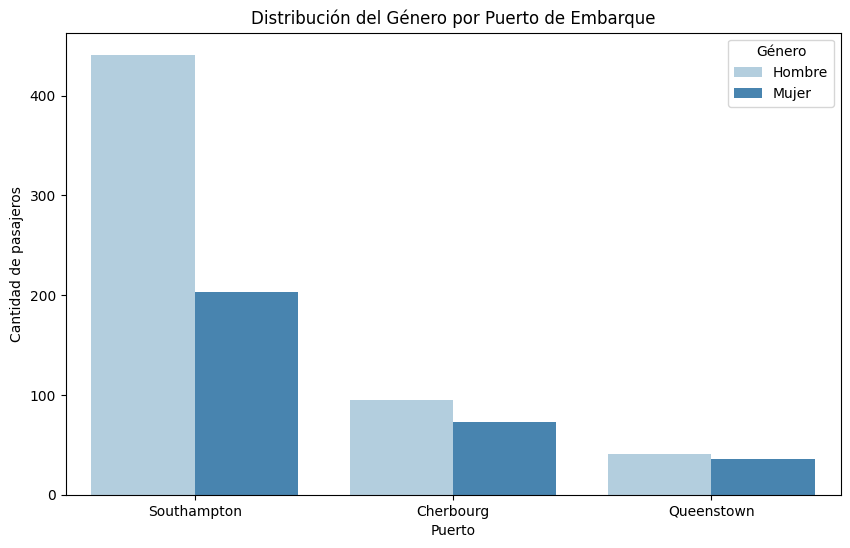

In [231]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Embarked', hue='Sex', data=df, palette='Blues')
plt.title('Distribución del Género por Puerto de Embarque')
plt.xlabel('Puerto')
plt.ylabel('Cantidad de pasajeros')
plt.xticks(ticks=['S','C','Q'], labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.legend(title='Género', labels=['Hombre', 'Mujer'])
plt.show()

* Distribución de supervivientes por género

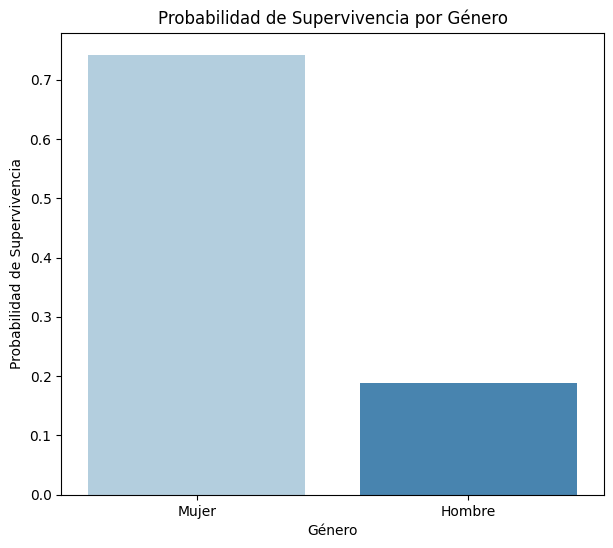

In [232]:
# Total de pasajeros por género
total_por_genero = df.groupby('Sex')['Survived'].count()

# Total de supervivientes por género
supervivientes_por_genero = df.groupby('Sex')['Survived'].sum()

# Probabilidad de supervivencia por género
probabilidad_genero = supervivientes_por_genero / total_por_genero
plt.figure(figsize=(7,6))
sns.barplot(x=probabilidad_genero.index, 
            y=probabilidad_genero.values, palette='Blues', 
            hue = probabilidad_genero.index, 
            legend= False)
plt.title("Probabilidad de Supervivencia por Género")
plt.xlabel("Género")
plt.ylabel("Probabilidad de Supervivencia")
plt.xticks(ticks=['female','male'], labels=['Mujer', 'Hombre'])
plt.show()


* Cantidad de pasajeros por clase

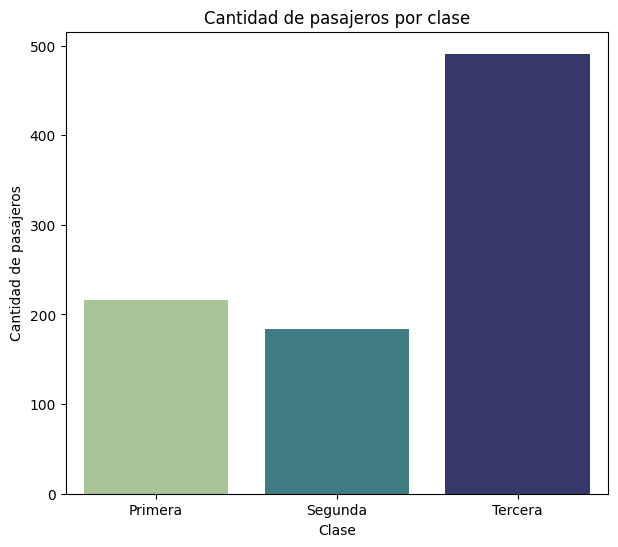

In [243]:
clases = df['Pclass'].value_counts().reset_index()
plt.figure(figsize=(7,6))
sns.barplot(data=clases, x ='Pclass', y='count', palette= 'crest',
            hue = 'Pclass',
            legend = False)
plt.title('Cantidad de pasajeros por clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de pasajeros')
plt.xticks(ticks=['1','2','3'], labels=['Primera', 'Segunda', 'Tercera'])
plt.show()

* Distribución de supervivientes por clase


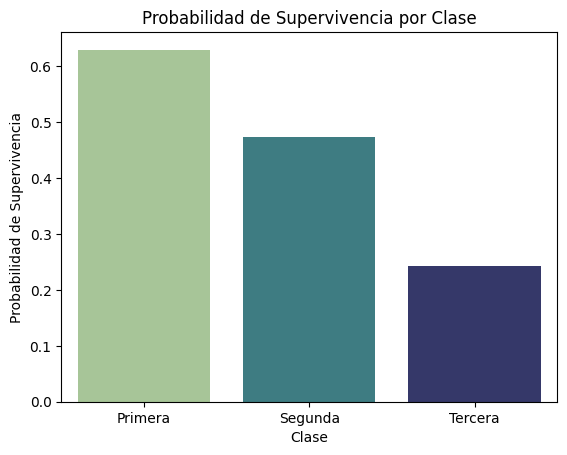

In [245]:
# Total de pasajeros por grupo de edad
total_por_clase = df.groupby('Pclass', observed=False)['Survived'].count()

# Total de supervivientes por grupo de edad
supervivientes_por_clase = df.groupby('Pclass', observed=False)['Survived'].sum()

# Probabilidad de supervivencia por grupo de edad
probabilidad_clase = supervivientes_por_clase / total_por_clase
sns.barplot(x=probabilidad_clase.index, y=probabilidad_clase.values, palette='crest',
            hue = probabilidad_clase.index, legend= False)
plt.title("Probabilidad de Supervivencia por Clase")
plt.xlabel("Clase")
plt.ylabel("Probabilidad de Supervivencia")
plt.xticks(ticks=['1','2','3'], labels=['Primera', 'Segunda', 'Tercera'])
plt.show()


* Distribución de pasajeros por edad después de la corrección:

In [251]:
# Se crea una nueva columna con los rangos de edades elegidos para ambos dataframe.
bins = [0, 15, 30, 45, 60, 80]
labels = ['0-15', '16-30', '31-45', '46-60','61-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

bins = [0, 15, 30, 45, 60, 80]
labels = ['0-15', '16-30', '31-45', '46-60','61-80']
datos['AgeGroup'] = pd.cut(datos['Age'], bins=bins, labels=labels, right=False)


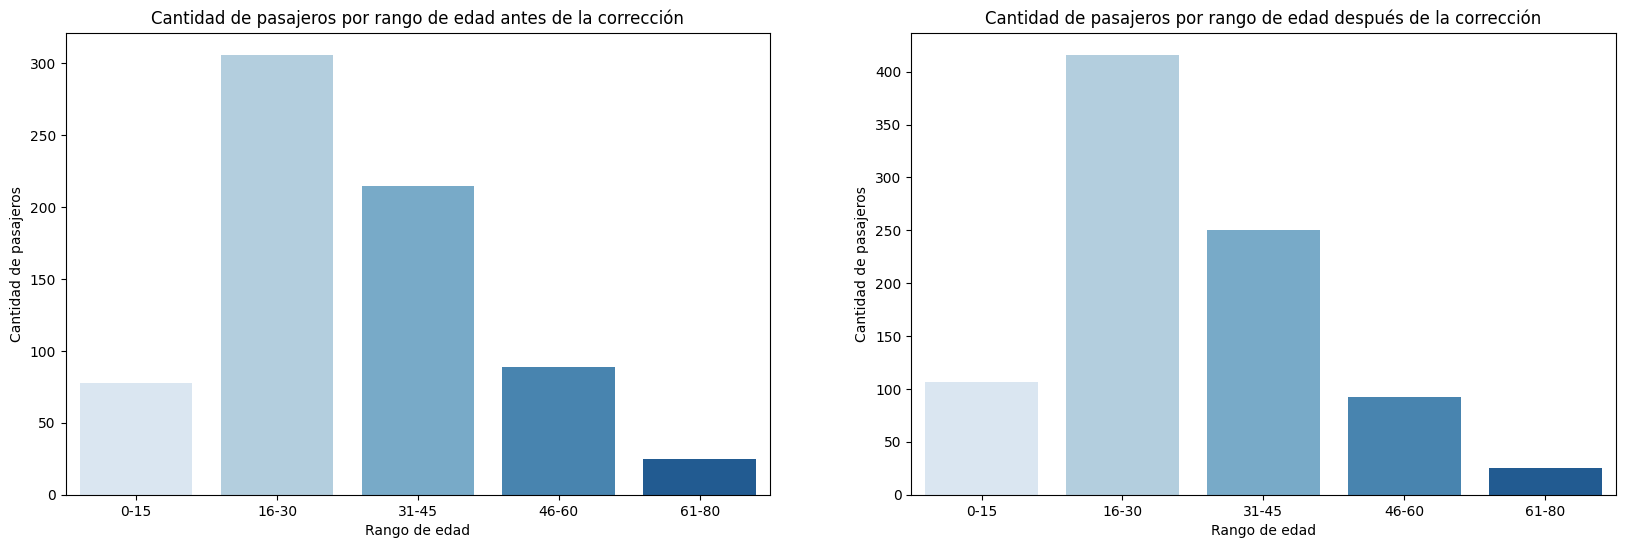

In [296]:
#Representación gráfica de la distribución de los pasajeros por rango de edad antes y después de la corrección:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.barplot(datos['AgeGroup'].value_counts().reset_index(), x='AgeGroup', 
            y = 'count', palette= 'Blues',
            hue = 'AgeGroup', ax=axes[0])
axes[0].set_title('Cantidad de pasajeros por rango de edad antes de la corrección')
axes[0].set_xlabel('Rango de edad')
axes[0].set_ylabel('Cantidad de pasajeros')

sns.barplot(df['AgeGroup'].value_counts().reset_index(), x='AgeGroup', 
            y = 'count', palette= 'Blues',
            hue = 'AgeGroup', ax=axes[1])
axes[1].set_title('Cantidad de pasajeros por rango de edad después de la corrección')
axes[1].set_xlabel('Rango de edad')
axes[1].set_ylabel('Cantidad de pasajeros');


* Probabilidad de supervivencia por rango de edad después de la corrección:

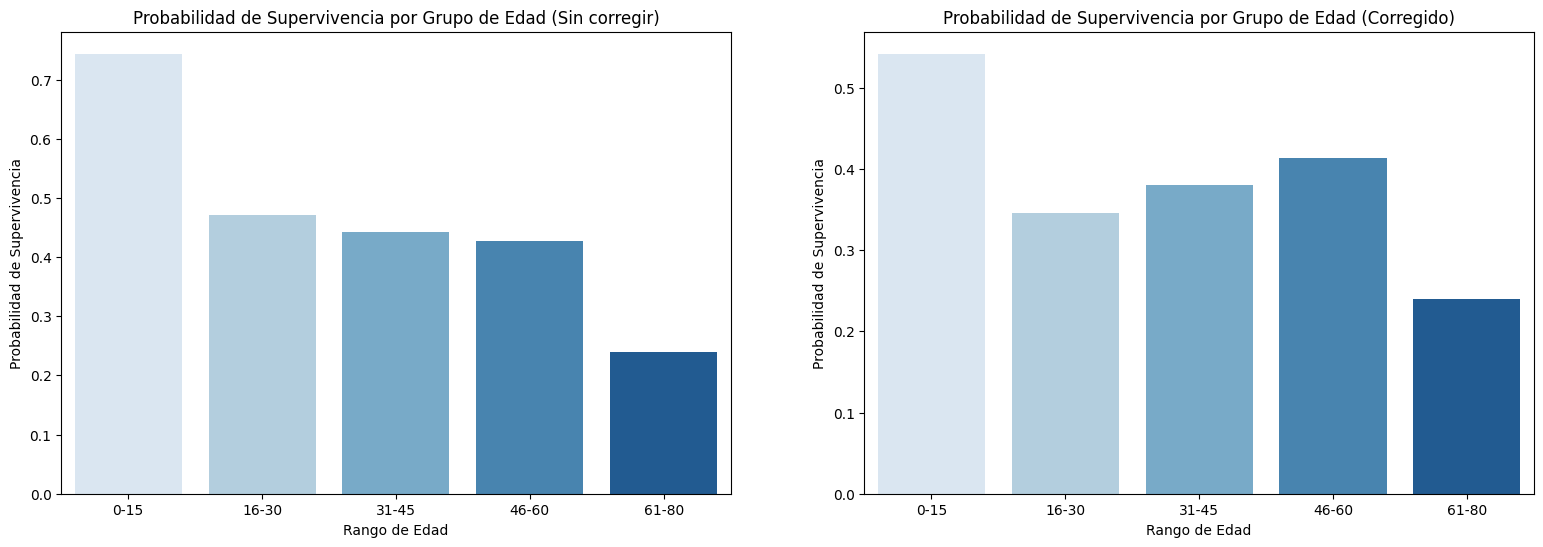

In [298]:
# Total de pasajeros por grupo de edad
total_por_edad_c= df.groupby('AgeGroup', observed=False)['Survived'].count()
total_por_edad_sc= datos.groupby('AgeGroup', observed=False)['Survived'].count()
# Total de supervivientes por grupo de edad
supervivientes_por_edad_c = df.groupby('AgeGroup', observed=False)['Survived'].sum()
supervivientes_por_edad_sc = df.groupby('AgeGroup', observed=False)['Survived'].sum()

# Probabilidad de supervivencia por grupo de edad
probabilidad_edad_c = supervivientes_por_edad_c / total_por_edad_c
probabilidad_edad_sc = supervivientes_por_edad_sc / total_por_edad_sc

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19,6))

sns.barplot(x=probabilidad_edad_sc.index, y=probabilidad_edad_sc.values, palette = 'Blues',
            hue = probabilidad_edad_sc.index, ax= axes[0])
axes[0].set_title("Probabilidad de Supervivencia por Grupo de Edad (Sin corregir)")
axes[0].set_xlabel("Rango de Edad")
axes[0].set_ylabel("Probabilidad de Supervivencia")

sns.barplot(x=probabilidad_edad_c.index, y=probabilidad_edad_c.values, palette = 'Blues',
            hue = probabilidad_edad_c.index, ax= axes[1])
axes[1].set_title("Probabilidad de Supervivencia por Grupo de Edad (Corregido)")
axes[1].set_xlabel("Rango de Edad")
axes[1].set_ylabel("Probabilidad de Supervivencia");